In [26]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE # https://distill.pub/2016/misread-tsne/
from sklearn.cluster import HDBSCAN
import glob
import time
import pandas as pd

In [3]:
cci = np.load('/datax/scratch/benjb/C23_L_M31_injections/HDBSCAN_100_seed_injections/non_anom_centroid_idxs.npy', allow_pickle=True)
ccc = np.load('/datax/scratch/benjb/C23_L_M31_injections/HDBSCAN_100_seed_injections/non_anom_centroids.npy', allow_pickle=True)

In [4]:
unique_ccc, unique_inv, counts = np.unique(ccc, axis=0, return_inverse=True, return_counts=True)

In [11]:
print(unique_ccc.shape)
print(unique_inv.shape)
print(unique_inv[:10])

(112577, 12)
(1489028, 1)
[[73194]
 [73194]
 [73194]
 [73194]
 [25381]
 [73709]
 [46684]
 [93802]
 [ 9222]
 [73709]]


In [15]:
print(unique_inv.max())

112576


In [30]:
m31_params = np.concatenate(np.load('/datax/scratch/benjb/C23_L_M31_injections/M31_retrieval_params.npy', allow_pickle=True))
m31_dat_paths = np.load('/datax/scratch/benjb/C23_L_M31_injections/M31_retrieval_dat_paths.npy', allow_pickle=True)
dats = np.sort(glob.glob('/datax/scratch/benjb/C23_L_M31_injections/blc7*.dat'))
freqs = []
drifts = []
snrs = []
for dat in dats:
    df = pd.read_table(dat, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)
    table_freqs = df['Uncorrected_Frequency'].values
    table_drifts = df['Drift_Rate'].values
    table_snrs = df['SNR'].values
    freqs.append(table_freqs)
    drifts.append(table_drifts)
    snrs.append(table_snrs)
freqs = np.concatenate(freqs)
drifts = np.concatenate(drifts)
snrs = np.concatenate(snrs)
tseti_params = np.transpose([freqs, drifts, snrs])
full_m31_params = np.hstack((tseti_params, m31_params))
print(full_m31_params.shape)
trimmed_m31_params = full_m31_params[
    np.where(((full_m31_params[:,0] > 1100) & (full_m31_params[:,0] < 1200)) |
             ((full_m31_params[:,0] > 1340) & (full_m31_params[:,0] < 1900)))[0]
]
trimmed_m31_dats = m31_dat_paths[
    np.where(((full_m31_params[:,0] > 1100) & (full_m31_params[:,0] < 1200)) |
             ((full_m31_params[:,0] > 1340) & (full_m31_params[:,0] < 1900)))[0]
]
print(trimmed_m31_params.shape)
hit_params = np.load('/datax/scratch/benjb/C23_L_unique_param_array.npy', allow_pickle=True)
hit_dats = np.load('/datax/scratch/benjb/C23_L_unique_dat_list.npy', allow_pickle=True)[:,1]
print(len(hit_dats))

ff = []
for i, dat in enumerate(hit_dats):
    if 'MESSIER031' in dat:
        if ('blc72' in dat) | ('blc73' in dat) | ('blc74' in dat) | ('blc75' in dat):
            ff.append(hit_params[i,0])

params_without_m31 = []
dats_without_m31 = []

for i, dat in enumerate(hit_dats):
    if 'MESSIER031' in dat:
        if ('blc72' in dat) | ('blc73' in dat) | ('blc74' in dat) | ('blc75' in dat):
            continue
    params_without_m31.append(hit_params[i])
    dats_without_m31.append(dat)

print(np.array(params_without_m31).shape)

hit_params = np.vstack((np.array(params_without_m31), trimmed_m31_params))
hit_dats = np.concatenate((np.array(dats_without_m31), trimmed_m31_dats[:,1]))
print(hit_params.shape)
print(hit_dats.shape)

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2427005/990230540.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(dat, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',


(15582, 12)
(12485, 12)
1917903
(1909390, 12)
(1921875, 12)
(1921875,)


In [19]:
counter = 0
for i, count in enumerate(counts):
    if (count < 40) | (count > 100):
        continue
    print(count)
    centroid = unique_ccc[i]
    #print(centroid)
    print(i)
    idxs = cci[np.where(unique_inv == i)[0]]
    print(len(idxs))
    print(ccc[np.where(unique_inv == i)[0]])
    print(idxs)
    counter += 1
    if counter > 1: # change to 10 for 10 figures
        break
    needed_params = hit_params[idxs]
    needed_dats = hit_dats[idxs]
    random_sample_idxs = np.random.choice(len(needed_params), 20, replace=False)
    random_sample_params = needed_params[random_sample_idxs]
    random_sample_dats = needed_dats[random_sample_idxs]
    fig, axs = plt.subplots(2, 10)
    for j in range(2):
        for k in range(10):
            ii = 10*j + k
            freq = random_sample_params[ii, 0]
            fb = bl.Waterfall(h5, f_start = freq-0.00135, f_stop = freq+0.00135)
            _, dynamic_spectrum = fb.grab_data()
            axs[j][k]

    break
print(counter)

45
1933
45
[[0.01075843 0.19407454 0.14772695 0.49198424 0.77846625 0.8930679
  0.95292395 0.93103185 0.4715329  0.41666202 0.2404868  0.01469201]
 [0.01075843 0.19407454 0.14772695 0.49198424 0.77846625 0.8930679
  0.95292395 0.93103185 0.4715329  0.41666202 0.2404868  0.01469201]
 [0.01075843 0.19407454 0.14772695 0.49198424 0.77846625 0.8930679
  0.95292395 0.93103185 0.4715329  0.41666202 0.2404868  0.01469201]
 [0.01075843 0.19407454 0.14772695 0.49198424 0.77846625 0.8930679
  0.95292395 0.93103185 0.4715329  0.41666202 0.2404868  0.01469201]
 [0.01075843 0.19407454 0.14772695 0.49198424 0.77846625 0.8930679
  0.95292395 0.93103185 0.4715329  0.41666202 0.2404868  0.01469201]
 [0.01075843 0.19407454 0.14772695 0.49198424 0.77846625 0.8930679
  0.95292395 0.93103185 0.4715329  0.41666202 0.2404868  0.01469201]
 [0.01075843 0.19407454 0.14772695 0.49198424 0.77846625 0.8930679
  0.95292395 0.93103185 0.4715329  0.41666202 0.2404868  0.01469201]
 [0.01075843 0.19407454 0.14772695 0.

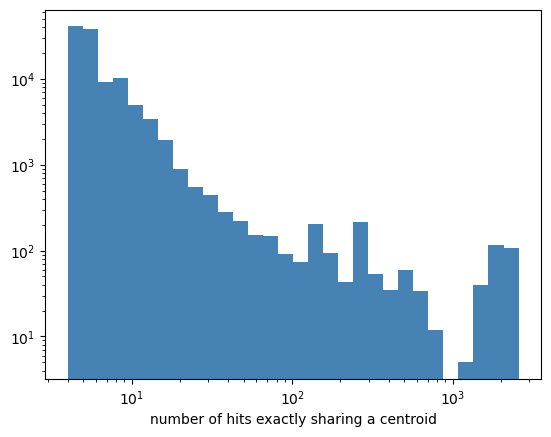

In [41]:
hist, bins = np.histogram(counts, bins=30)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.hist(counts, color='steelblue', bins=logbins)

#plt.hist(param_array[:,4], color='steelblue', bins=50)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'number of hits exactly sharing a centroid')
plt.show()

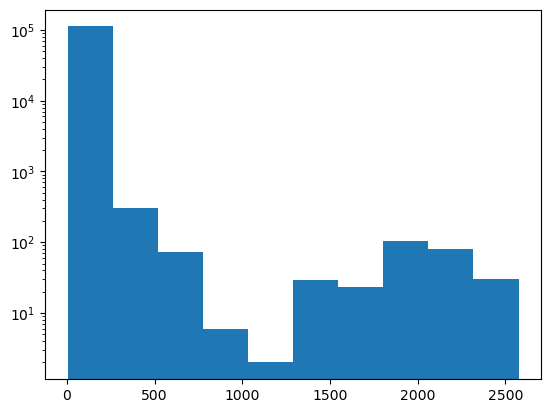

In [34]:
plt.hist(counts)
plt.yscale('log')
plt.show()

In [15]:
'''counts = [100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000]
times = []

for count in counts:
    print(f'Working on {count}')
    start = time.time()
    iii = np.random.randint(0, len(ccc), count)
    X_embedded = TSNE(n_components=2, 
                      init='random', perplexity=30).fit_transform(ccc[iii])
    end = time.time()
    t = end - start
    times.append(t)'''

Working on 100


Working on 250
Working on 500
Working on 750
Working on 1000
Working on 2500
Working on 5000
Working on 7500
Working on 10000


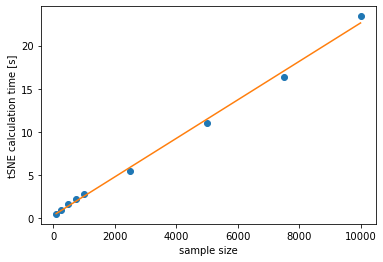

In [17]:
'''import matplotlib.pyplot as plt

z = np.polyfit(counts, times, 1)
p = np.poly1d(z)

#xxx = np.linspace(np.min(counts), np.max(counts), 100)

plt.plot(counts, times, 'o')
plt.plot(counts, p(counts))
#plt.plot(xxx, 10**(p(np.log10(xxx))))
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('sample size')
plt.ylabel('tSNE calculation time [s]')
plt.show()'''

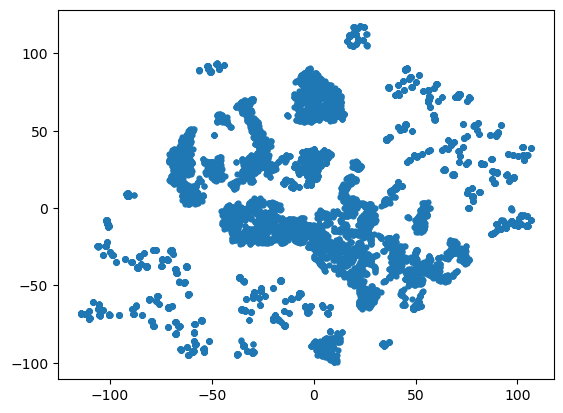

In [20]:
iii = np.random.randint(0, len(cci), 10000)

xembed = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=40, early_exaggeration=4).fit_transform(ccc[iii])

plt.scatter(xembed[:,0], xembed[:,1], s=5, linewidths=0, alpha=1)
#plt.colorbar()
plt.show()

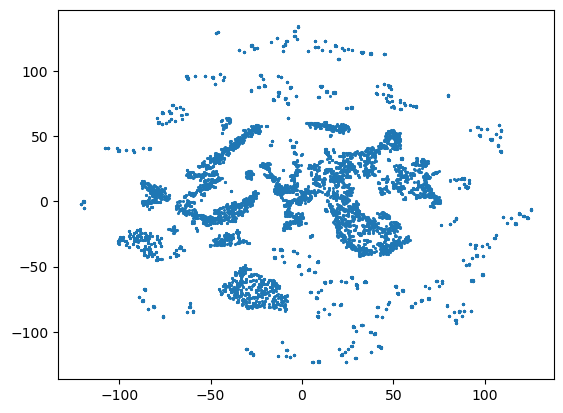

In [22]:
xembed = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=30, early_exaggeration=4).fit_transform(ccc[iii])

plt.scatter(xembed[:,0], xembed[:,1], s=5, linewidths=0, alpha=1)
#plt.colorbar()
plt.show()

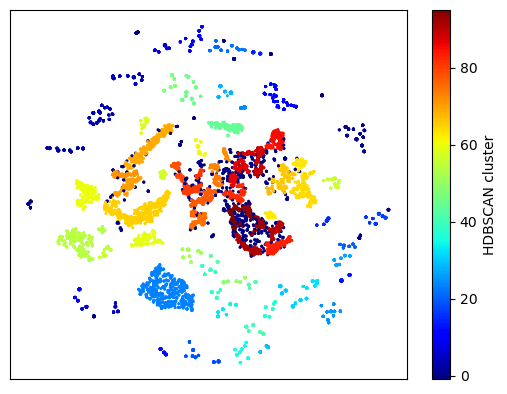

In [29]:
nmincluster = 30
nminsamples = 10
eps = 0

hdb = HDBSCAN(min_cluster_size=nmincluster, 
              min_samples=nminsamples, 
              cluster_selection_epsilon=eps, 
              cluster_selection_method='eom', 
              store_centers='centroid')

hdb.fit(xembed)

fig, ax = plt.subplots()
s = ax.scatter(xembed[:,0], xembed[:,1], 
            c=hdb.labels_,
            cmap='jet',
            #vmin=-0.5, vmax=14.5,
            s=5, linewidths=0, alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig.colorbar(mappable=s, label=r'HDBSCAN cluster', ax=ax)
plt.show()

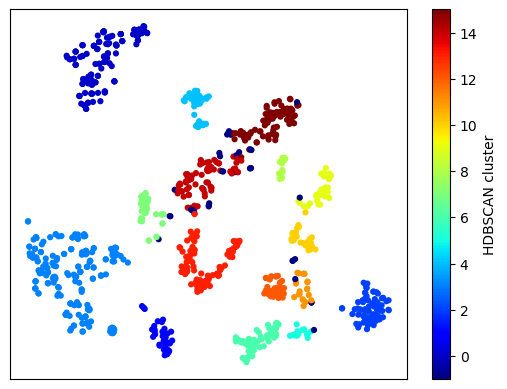

In [17]:
nmincluster = 15
nminsamples = 10
eps = 0

hdb = HDBSCAN(min_cluster_size=nmincluster, 
              min_samples=nminsamples, 
              cluster_selection_epsilon=eps, 
              cluster_selection_method='eom', 
              store_centers='centroid')

xembed = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=20, early_exaggeration=15).fit_transform(ccc[iii])

hdb.fit(xembed)

fig, ax = plt.subplots()
s = ax.scatter(xembed[:,0], xembed[:,1], 
            c=hdb.labels_,
            cmap='jet',
            #vmin=-0.5, vmax=14.5,
            s=20, linewidths=0, alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig.colorbar(mappable=s, label=r'HDBSCAN cluster', ax=ax)
plt.show()

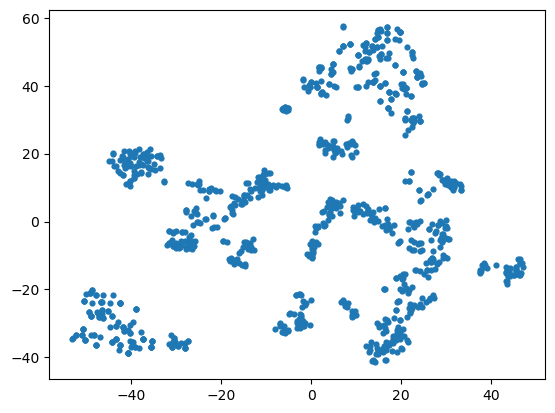

In [6]:
xembed = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=20, early_exaggeration=15).fit_transform(ccc[iii])

plt.scatter(xembed[:,0], xembed[:,1], s=20, linewidths=0, alpha=1)
#plt.colorbar()
plt.show()

In [16]:
X_embedded = TSNE(n_components=2, 
                  init='random', perplexity=20).fit_transform(ccc)

#np.save('/datax/scratch/benjb/C23_L_tSNE_non_anom_centroid_embedding_p20.npy', X_embedded)

KeyboardInterrupt: 

In [2]:
X_embedded = np.load('/datax/scratch/benjb/C23_L_tSNE_non_anom_centroid_embedding.npy')

In [3]:
print(X_embedded.shape)

(1782224, 2)


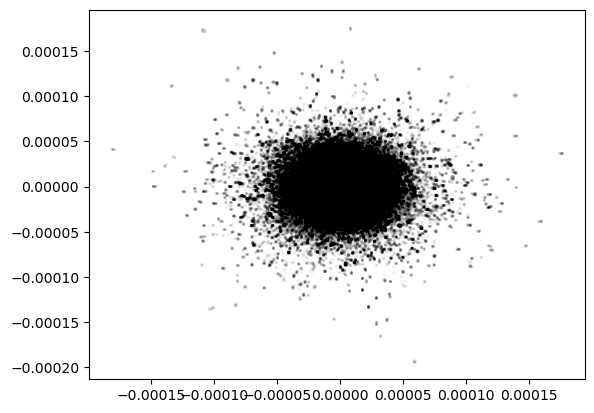

In [11]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], color='k', s=2, alpha=0.01)
plt.show()

In [15]:
print(ccc.shape)

(1782224, 12)


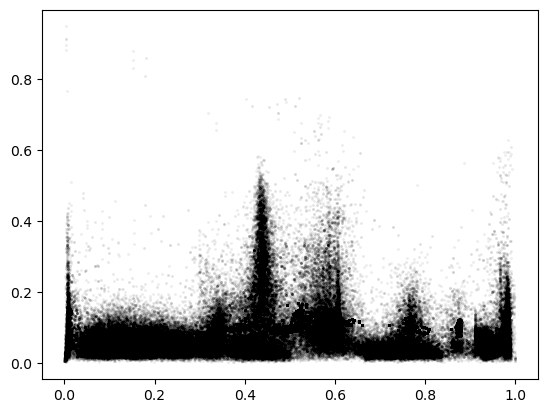

In [14]:
plt.scatter(ccc[:,0], ccc[:,2], color='k', s=2, alpha=0.01)
plt.show()